## HW4

季宇桐 2100017820

#### 第一题

最速下降法：

$A=\begin{pmatrix}
0.05 & 0.07 & 0.06 & 0.05 \\
0.07 & 0.10 & 0.08 & 0.07 \\
0.06 & 0.08 & 0.10 & 0.09 \\
0.05 & 0.07 & 0.09 & 0.10
\end{pmatrix}$,

$\mathbf{b}=\begin{pmatrix}
0.23 \\
0.32 \\
0.33 \\
0.31
\end{pmatrix}$.

In [54]:
import numpy as np

A=np.array([[0.05, 0.07, 0.06, 0.05], [0.07, 0.10, 0.08, 0.07], [0.06, 0.08, 0.10, 0.09], [0.05, 0.07, 0.09, 0.10]])
b=np.array([0.23,0.32,0.33,0.31])
x=np.array([0, 0, 0, 0])
#输入A、b，设置初始向量。
i=0#统计迭代次数

r=b-np.dot(A,x)
while np.linalg.norm(r)>10**(-15): #设置残差的允许误差
    alpha = np.dot(r.T, r)/np.dot(np.dot(r.T, A), r)
    x = x + np.dot(alpha, r)
    r = r - np.dot(np.dot(alpha, A), r)
    i += 1
print(i)
print(x)

25377
[1. 1. 1. 1.]


事实上，我们将允许残差设置的比较小，可以得到很不错的结果。从$x_0=[0,0,0,0]$开始，在$||r|| > 10^{-15}$时，迭代次数为25377.

下面是共轭梯度法：

In [55]:
import numpy as np

A=np.array([[0.05, 0.07, 0.06, 0.05], [0.07, 0.10, 0.08, 0.07], [0.06, 0.08, 0.10, 0.09], [0.05, 0.07, 0.09, 0.10]])
b=np.array([0.23,0.32,0.33,0.31])
x=np.array([0, 0, 0, 0])
#输入A、b，设置初始向量。

r = b-np.dot(A,x)
p = r
k = 0 #可以用k统计迭代次数
while np.linalg.norm(r)>10**(-15): #设置残差的允许误差
    alpha = np.dot(r.T, p)/np.dot(np.dot(p.T, A), p)
    x = x + np.dot(alpha, p)
    r = r - np.dot(np.dot(alpha, A), p)
    beta = -np.dot(np.dot(r.T, A), p)/np.dot(np.dot(p.T, A), p)
    p = r + np.dot(beta, p)
    k += 1
print(k)
print(x)

5
[1. 1. 1. 1.]


同样的初始条件和残差，共轭梯度法仅需5次迭代！效率大大提升了。

#### 第二题

1.QR算法

In [56]:
import numpy as np

T = np.array([[1,-1,0,0],[-1,2,-1,0],[0,-1,3,-1],[0,0,-1,4]])#T自然满足Hessenberg矩阵


for i in range(0,21):
    if i == 5 or i == 10 or i==15 or i==20:
        print("T",i,"=",T)
    c1 = T[0][0]/(T[0][0]**2+T[1][0]**2)**0.5
    s1 = T[1][0]/(T[0][0]**2+T[1][0]**2)**0.5
    G1 = np.array([[c1,s1,0,0],[-s1,c1,0,0],[0,0,1,0],[0,0,0,1]])
    T = np.dot(G1,T)
    c2 = T[1][1]/(T[1][1]**2+T[2][1]**2)**0.5
    s2 = T[2][1]/(T[1][1]**2+T[2][1]**2)**0.5
    G2 = np.array([[1,0,0,0],[0,c2,s2,0],[0,-s2,c2,0],[0,0,0,1]])
    T = np.dot(G2,T)
    c3 = T[2][2]/(T[2][2]**2+T[3][2]**2)**0.5
    s3 = T[3][2]/(T[2][2]**2+T[3][2]**2)**0.5
    G3 = np.array([[1,0,0,0],[0,1,0,0],[0,0,c3,s3],[0,0,-s3,c3]])
    T = np.dot(G3,T)
    Q = np.dot(np.dot(G3,G2),G1).T
    T = np.dot(T,Q)

T 5 = [[ 4.29276628e+00 -7.21313977e-01  1.18290784e-16 -2.29551395e-17]
 [-7.21313977e-01  3.55611356e+00 -3.34967464e-01 -1.95921060e-16]
 [-3.92176166e-18 -3.34967464e-01  1.89640130e+00 -3.99652715e-04]
 [-5.80401550e-17 -5.78243393e-17 -3.99652715e-04  2.54718859e-01]]
T 10 = [[ 4.73418406e+00 -1.31448547e-01  1.90291129e-17  7.47704268e-17]
 [-1.31448547e-01  3.18812610e+00 -1.85822775e-02 -2.03975215e-16]
 [-3.00003593e-18 -1.85822775e-02  1.82297108e+00 -2.07643132e-08]
 [-2.48127813e-17 -7.76570520e-17 -2.07643133e-08  2.54718760e-01]]
T 15 = [[ 4.74507887e+00 -1.78120256e-02  8.83278541e-18  8.94531853e-17]
 [-1.78120256e-02  3.17748431e+00 -1.15075434e-03 -1.99046274e-16]
 [-2.88973043e-18 -1.15075434e-03  1.82271806e+00 -1.10650503e-12]
 [-1.90935717e-17 -7.92553841e-17 -1.10658670e-12  2.54718760e-01]]
T 20 = [[ 4.74527757e+00 -2.39738535e-03  7.80821904e-18  9.14060660e-17]
 [-2.39738535e-03  3.17728658e+00 -7.14944440e-05 -1.98222207e-16]
 [-2.88916389e-18 -7.14944440e-0

迭代20次后本征值的结果为：
$\begin{pmatrix}
4.74528\\
3.17729\\
1.82272\\
0.25472
\end{pmatrix}$

2.Jacobi算法：

In [57]:
import numpy as np

T = np.array([[1,-1,0,0],[-1,2,-1,0],[0,-1,3,-1],[0,0,-1,4]])

for k in range(0,21):
    if k == 5 or k == 10 or k == 15 or k == 20:
        print("T",k,"=",T)
    i = 0
    j = 0
    max = 0
    for p in range(0,4):
        for q in range(0,4):
            if p!=q:
                if abs(T[p][q])>max:
                    max = abs(T[p][q])
                    i = p
                    j = q
    #找到最大非对角元
    n = (T[j][j]-T[i][i])/(2*T[i][j])      
    if n >= 0:
        t = 1/(n+(1+n*n)**0.5)
    else:
        t = -1/(-n+(1+n*n)**0.5)
    c = 1/(1+t*t)**0.5
    s =c*t

    G = np.eye(4,4)
    for p in range(0,4):
        for q in range(0,4):
            if q == p == i or q == p == j:
                G[p][q] = c
            elif p == i and q == j:
                G[p][q] = s
            elif p == j and q == i:
                G[p][q] = -s

    T = np.dot(np.dot(G.T,T),G)

T 5 = [[ 3.02671876e-01  1.98877843e-01  2.83269704e-17  3.90083050e-01]
 [ 1.98877843e-01  3.15387625e+00 -1.13689848e-01  1.15838509e-16]
 [ 6.75012884e-17 -1.13689848e-01  1.84612375e+00  1.98877843e-01]
 [ 3.90083050e-01  2.65066327e-18  1.98877843e-01  4.69732812e+00]]
T 10 = [[ 2.54777527e-01  8.28956379e-04 -9.51832874e-03 -1.84018719e-03]
 [ 8.28956379e-04  3.17728268e+00 -4.96426137e-06  1.61604514e-18]
 [-9.51832874e-03 -4.96426137e-06  1.82265953e+00  8.17755211e-04]
 [-1.84018719e-03 -1.19810643e-16  8.17755211e-04  4.74528026e+00]]
T 15 = [[ 2.54718760e-01 -2.52092539e-12  3.41591974e-07  1.92963664e-10]
 [-2.52080976e-12  3.17728292e+00  2.26832338e-17 -3.41591974e-07]
 [ 3.41591974e-07 -1.77479184e-21  1.82271708e+00 -2.52080937e-12]
 [ 1.92963627e-10 -3.41591974e-07 -2.52086175e-12  4.74528124e+00]]
T 20 = [[ 2.54718760e-01  1.00974196e-28 -5.56634345e-17  8.23065834e-27]
 [ 1.15625269e-16  3.17728292e+00  2.15849035e-17  1.21395667e-16]
 [ 9.98556449e-23 -1.10011893e-1

迭代20次后本征值的结果为：
$\begin{pmatrix}
0.25472\\
3.17729\\
1.82272\\
4.74528
\end{pmatrix}$

对比观察可发现，相较于QR算法前期收敛速度更快。

3.Sturm序列+对分法：

In [58]:
import numpy as np

T = np.array([[1,-1,0,0],[-1,2,-1,0],[0,-1,3,-1],[0,0,-1,4]])

d = np.array([1,2,3,4])
b = np.array([-1,-1,-1])

def p(i,x):
    if i == 0:
        return 1
    elif i == 1:
        return d[0]-x
    else:
        return (d[i-1]-x)*p(i-1,x)-b[i-2]**2*p(i-2,x)

for j in range(1,5):#第j个本征值
    a = 0
    bb = 6#目测
    for k in range(0,21):
        if k == 5 or k == 10 or k == 15 or k == 20:
            print(k,"th-iterations' lambda",j,"=",c)
        c = (a+bb)/2
        s = 0
        for i in range(1,5):
            if p(i,c)*p(i-1,c)<0 or p(i,c)==0:
                s+=1
        if s > 4 - j:
            bb = c
        else:
            a = c


5 th-iterations' lambda 1 = 4.6875
10 th-iterations' lambda 1 = 4.740234375
15 th-iterations' lambda 1 = 4.74517822265625
20 th-iterations' lambda 1 = 4.74528694152832
5 th-iterations' lambda 2 = 3.1875
10 th-iterations' lambda 2 = 3.181640625
15 th-iterations' lambda 2 = 3.17742919921875
20 th-iterations' lambda 2 = 3.177286148071289
5 th-iterations' lambda 3 = 1.6875
10 th-iterations' lambda 3 = 1.822265625
15 th-iterations' lambda 3 = 1.82281494140625
20 th-iterations' lambda 3 = 1.8227176666259766
5 th-iterations' lambda 4 = 0.1875
10 th-iterations' lambda 4 = 0.251953125
15 th-iterations' lambda 4 = 0.25469970703125
20 th-iterations' lambda 4 = 0.2547168731689453


迭代20次后本征值的结果为：
$\begin{pmatrix}
4.74528\\
3.17729\\
1.82272\\
0.25472
\end{pmatrix}$

#### 第三题

（a）对于试探解$x(t)=x e^{-i\omega t}$，$x^{\prime\prime}=-\omega^2 x(t)=-Ax$，则$Ax=\omega^2 x$

（b）N=10

In [59]:
import numpy as np

def kronecker(a,b):
    if a == b:
        return 1
    else:
        return 0

A = np.zeros((10,10))
for i in range(0,10):
    for j in range(0,10):
        A[i][j]=-kronecker(i-1,j)-kronecker(i+1,j)+2*kronecker(i,j)

    q = np.ones(10)
for k in range(0,1000):
    z = np.dot(A,q)
    q = z/np.linalg.norm(z)
    v = np.dot(np.dot(np.conj(q),A),q)

print("绝对值最大的本征值是",v)
print("对应的本征矢：",q)

绝对值最大的本征值是 3.9189859472289945
对应的本征矢： [-0.12013117  0.23053002 -0.3222527   0.38786839 -0.42206128  0.42206128
 -0.38786839  0.3222527  -0.23053002  0.12013117]


结果见输出。

#### 第四题

把Fortran代码改写为python：

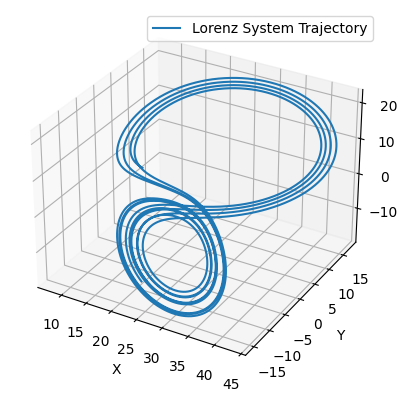

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

nstep = 100000
xfinal = 10.0
xini = 0.0
beta = 8.0 / 3.0
rho = 28.0
sigma = 10.0

file_name_out = 'plot1.gnu'
with open(file_name_out, 'w') as file:
    for i in range(1, nstep + 2):
        x = 12.0 if i == 1 else x + (xfinal - xini) / nstep * (-beta * x + y * z)
        y = 4.0 if i == 1 else y + (xfinal - xini) / nstep * (-sigma * y + sigma * z)
        z = 0.0 if i == 1 else z + (xfinal - xini) / nstep * (-y * x + rho * y - z)

        file.write(f"{x:15.7e} {y:15.7e} {z:15.7e}\n")

# 读取数据
data = np.loadtxt(file_name_out)

# 可视化
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(data[:, 0], data[:, 1], data[:, 2], label='Lorenz attractor')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()



上面是$\beta=\frac{8}{3},\rho=28,\sigma=10$的情况，下面我们修改参数：
分别为

$\beta=1,\rho=50,\sigma=5$和$\beta=3,\rho=28.5,\sigma=11$

生成的数据文件见plot.gnu

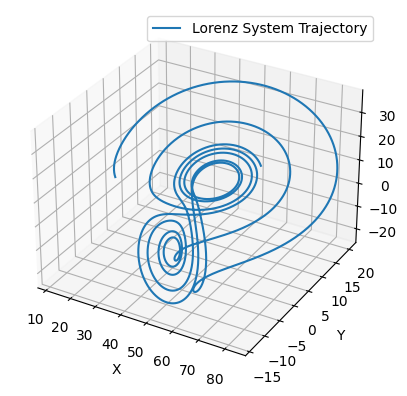

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

nstep = 100000
xfinal = 10.0
xini = 0.0
beta = 1
rho = 50
sigma = 5#更改几个参数

file_name_out = 'plot2.gnu'
with open(file_name_out, 'w') as file:
    for i in range(1, nstep + 2):
        x = 12.0 if i == 1 else x + (xfinal - xini) / nstep * (-beta * x + y * z)
        y = 4.0 if i == 1 else y + (xfinal - xini) / nstep * (-sigma * y + sigma * z)
        z = 0.0 if i == 1 else z + (xfinal - xini) / nstep * (-y * x + rho * y - z)

        file.write(f"{x:15.7e} {y:15.7e} {z:15.7e}\n")

# 读取数据
data = np.loadtxt(file_name_out)

# 可视化
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(data[:, 0], data[:, 1], data[:, 2], label='Lorenz attractor')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()



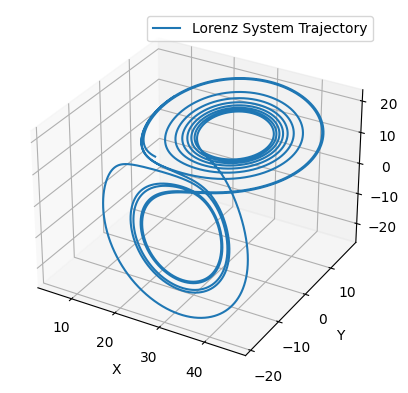

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

nstep = 100000
xfinal = 10.0
xini = 0.0
beta = 3
rho = 28.5
sigma = 11#更改几个参数

file_name_out = 'plot3.gnu'
with open(file_name_out, 'w') as file:
    for i in range(1, nstep + 2):
        x = 12.0 if i == 1 else x + (xfinal - xini) / nstep * (-beta * x + y * z)
        y = 4.0 if i == 1 else y + (xfinal - xini) / nstep * (-sigma * y + sigma * z)
        z = 0.0 if i == 1 else z + (xfinal - xini) / nstep * (-y * x + rho * y - z)

        file.write(f"{x:15.7e} {y:15.7e} {z:15.7e}\n")

# 读取数据
data = np.loadtxt(file_name_out)

# 可视化
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(data[:, 0], data[:, 1], data[:, 2], label='attractor')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()

